In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

plt.style.use("seaborn-white")
warnings.filterwarnings('ignore')

In [2]:
X = np.random.normal(0, 1, 100)
e = np.random.normal(0, 0.2, 100)

Y = 0.4 + 0.2 * X + 0.4 * X**2 + 0.65 * X**3 + e

X.shape, Y.shape

((100,), (100,))

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(X)
X_poly = PolynomialFeatures(degree = 10).fit_transform(X)
X_poly = pd.DataFrame(X_poly)

# Normalizing features
X_poly = StandardScaler().fit_transform(X_poly)
X_poly

array([[ 0.        , -0.07836115, -0.66157094, ..., -0.22295127,
        -0.02879984, -0.18670573],
       [ 0.        , -0.41426501, -0.54307401, ..., -0.22294798,
        -0.02880037, -0.18670565],
       [ 0.        ,  1.13413314,  0.16396085, ..., -0.21643348,
        -0.02612153, -0.18556978],
       ...,
       [ 0.        ,  0.46672249, -0.53329754, ..., -0.22294681,
        -0.02879911, -0.18670561],
       [ 0.        ,  0.52527108, -0.49592719, ..., -0.22293939,
        -0.02879763, -0.1867053 ],
       [ 0.        , -0.03735384, -0.66571946, ..., -0.22295127,
        -0.02879984, -0.18670573]])

## Ridge Regression

In [4]:
alphas = 10**np.linspace(10,-2,100)*0.5

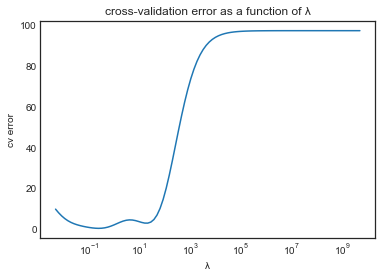

In [5]:
ridge = Ridge()
cv_errors = []

for a in alphas:
    ridge.set_params(alpha = a)
    errors = np.sum(-cross_val_score(ridge, 
                                 X_poly, 
                                 y = Y, 
                                 scoring = 'neg_mean_squared_error', 
                                 cv = 10, 
                                 n_jobs = -1))
    cv_errors.append(errors)
    
ax = plt.gca()
ax.plot(alphas, cv_errors)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('λ')
plt.ylabel('cv error')
plt.title('cross-validation error as a function of λ');

In [6]:
ridgecv = RidgeCV(alphas = alphas, scoring = "neg_mean_squared_error", cv = 10)
ridgecv.fit(X_poly, Y)
ridgecv.alpha_

0.24885117821660568

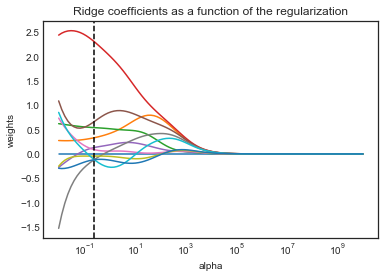

In [7]:
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_poly, Y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axvline(ridgecv.alpha_, linestyle='--', color = 'k')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [8]:
ridge_final = Ridge(alpha = ridgecv.alpha_)
ridge_final.fit(X_poly, Y)
ridge_final.coef_

array([ 0.        ,  0.37007818,  0.53167056,  2.17221192,  0.15925091,
        0.77119285,  0.06378785, -0.02270182, -0.0440497 , -0.21947578,
       -0.11094306])

Below you can find feature that we need to exclude: $$X^0$$

Then we need to perform multiple linear regression using this features as predictors: $$X^1, X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9$$

## Lasso Regression

In [9]:
lasso_alphas = 10**np.linspace(10,-2,100)*0.5

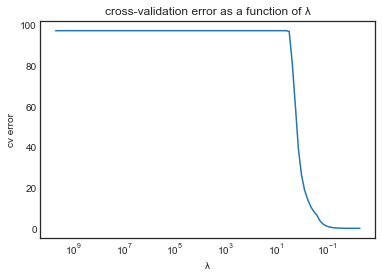

In [10]:
lasso = Lasso()
cv_errors = []

for a in lasso_alphas:
    lasso.set_params(alpha = a)
    errors = np.sum(-cross_val_score(lasso, 
                                 X_poly, 
                                 y = Y, 
                                 scoring = 'neg_mean_squared_error', 
                                 cv = 10, 
                                 n_jobs = -1))
    cv_errors.append(errors)


ax = plt.gca()
ax.plot(lasso_alphas, cv_errors)
ax.set_xscale('log')
plt.axis('tight')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('λ')
plt.ylabel('cv error')
plt.title('cross-validation error as a function of λ');

In [11]:
lassocv = LassoCV(alphas = lasso_alphas, cv = 10, max_iter = 10000)
lassocv.fit(X_poly, Y)

lassocv.alpha_

0.006609705742330144

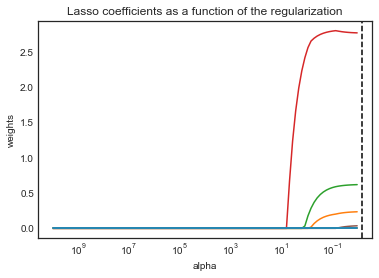

In [12]:
lasso = Lasso()
lasso_coefs = []

for a in lasso_alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_poly, Y)
    lasso_coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lasso_alphas * 2, lasso_coefs)
ax.set_xscale('log')
plt.axis('tight')
ax.set_xlim(ax.get_xlim()[::-1])
plt.axvline(lassocv.alpha_, linestyle='--', color = 'k')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

In [13]:
lasso_final = Lasso()
lasso_final.set_params(alpha = lassocv.alpha_)
lasso_final.fit(X_poly, Y)

lasso_coefs = pd.Series(lasso_final.coef_, index = range(11))
lasso_coefs

0     0.000000
1     0.232707
2     0.616936
3     2.767615
4     0.000000
5     0.033999
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10   -0.000000
dtype: float64

Choosing the following predictors for the further regression analysis: $$X^1, X^2, X^3, X^{10}$$ 

In [14]:
X_final_Poly = X_poly 
X_final_Poly

array([[ 0.        , -0.07836115, -0.66157094, ..., -0.22295127,
        -0.02879984, -0.18670573],
       [ 0.        , -0.41426501, -0.54307401, ..., -0.22294798,
        -0.02880037, -0.18670565],
       [ 0.        ,  1.13413314,  0.16396085, ..., -0.21643348,
        -0.02612153, -0.18556978],
       ...,
       [ 0.        ,  0.46672249, -0.53329754, ..., -0.22294681,
        -0.02879911, -0.18670561],
       [ 0.        ,  0.52527108, -0.49592719, ..., -0.22293939,
        -0.02879763, -0.1867053 ],
       [ 0.        , -0.03735384, -0.66571946, ..., -0.22295127,
        -0.02879984, -0.18670573]])

In [15]:
lasso_final = Lasso(alpha = lassocv.alpha_)
lasso_final.fit(X_final_Poly, Y)

lasso_final.coef_

array([ 0.        ,  0.23270687,  0.6169361 ,  2.76761492,  0.        ,
        0.03399897,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ])